Laod the Dataset

In [1]:
# Step 1: Load the dataset
import pandas as pd

# Loading the dataset
file_path = 'WineQT.csv'
wine_data = pd.read_csv(file_path)

# Displaying dataset information
print("Dataset Loaded Successfully!")
print("\nDataset Information:")
print(wine_data.info())

print("\nFirst 5 Rows of the Dataset:")
print(wine_data.head())


Dataset Loaded Successfully!

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

First 5 Rows of th

Step 2: Handle Missing Data and Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler

def preprocess_wine_data(data):
    """
    Lets Start with Preprocess the Wine Quality dataset by handling missing values and scaling numerical features.

    Args:
    - data (DataFrame): The Wine Quality dataset.

    Returns:
    preprocessed_data (DataFrame): The processed dataset ready for modeling.
    scaler (StandardScaler): The scaler fitted on the dataset.
    """
    # Handle missing values (if any)
    if data.isnull().sum().sum() > 0:
        print("Handling missing values...")
        data = data.fillna(data.median())

    # Separate features and target
    features = data.drop(columns=['quality', 'Id'])  # Drop target and ID column
    target = data['quality']

    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Convert scaled features back to a DataFrame
    scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
    scaled_data['quality'] = target  # Add target column back

    return scaled_data, scaler

# Now Applying preprocessing to the dataset
processed_wine_data, scaler = preprocess_wine_data(wine_data)

# Display the first few rows of the processed data
print("\nPreprocessed Data (First 5 Rows):")
print(processed_wine_data.head())


Preprocessed Data (First 5 Rows):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1      -0.292593          1.941813    -1.365027        0.050060   0.234247   
2      -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3       1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   

    alcohol  quality 

Step 3: Exploratory Data Analysis (EDA)
 In This we will do EDA of DATASET

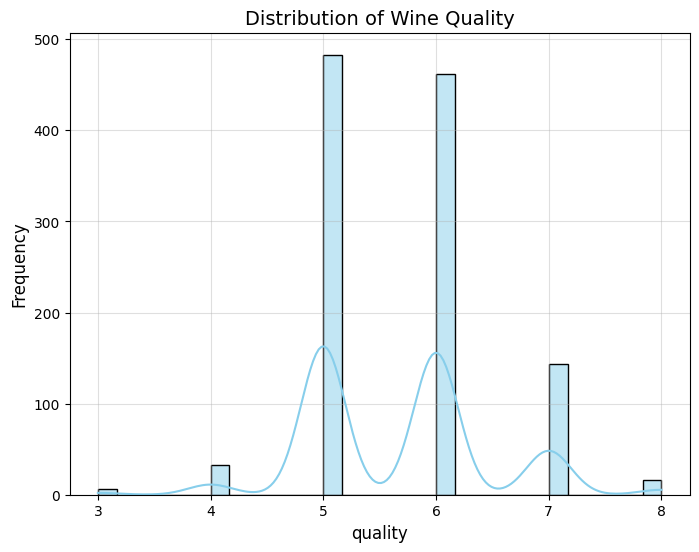

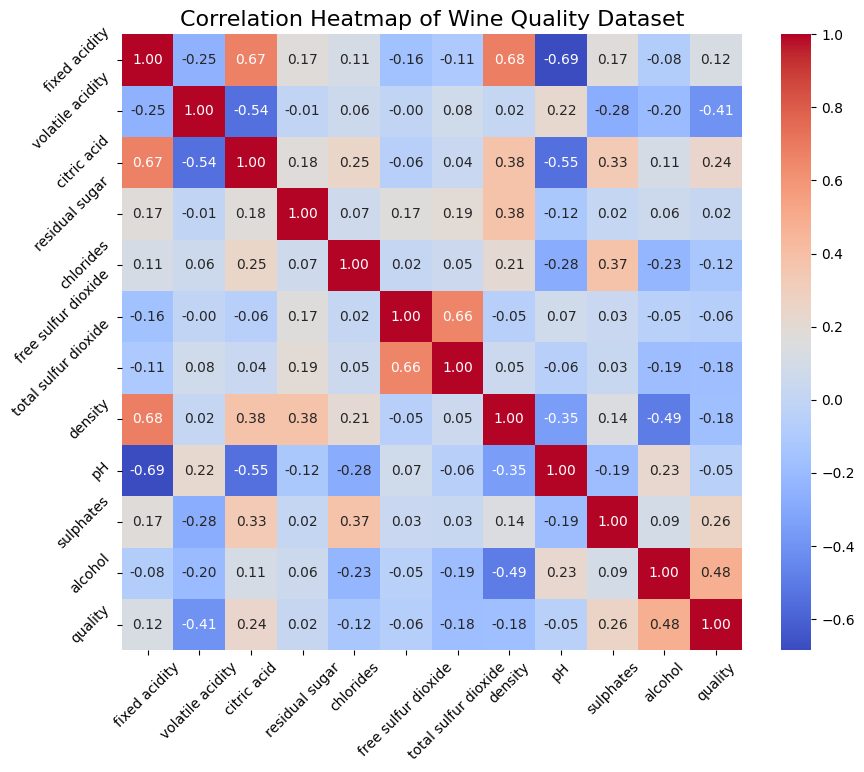

Pairwise Relationships Among Top Features


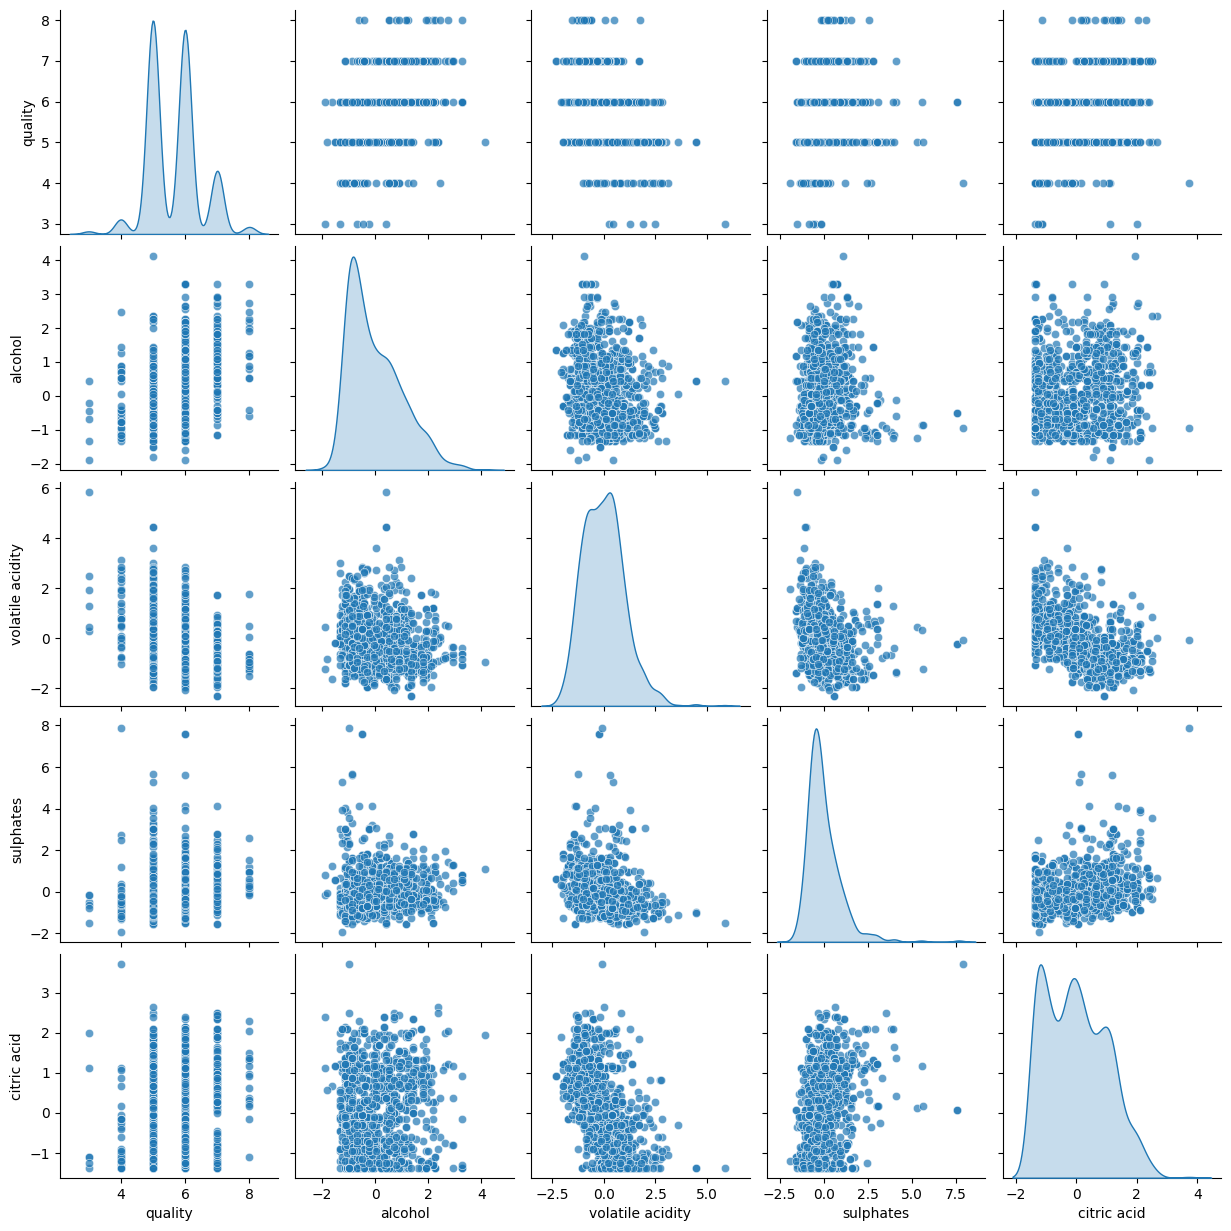

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(data, column, title):
    """
    Plot a histogram with a KDE overlay for a specific column in the dataset.

    Args:
    - data (DataFrame): The dataset containing the column.
    - column (str): The column to visualize.
    - title (str): The title of the plot.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(alpha=0.4)
    plt.show()

# Plot the distribution of the target variable 'quality'
plot_histogram(processed_wine_data, 'quality', 'Distribution of Wine Quality')

# Correlation heatmap
def plot_correlation_heatmap(data, title):

    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

# Visualize the correlation heatmap
plot_correlation_heatmap(processed_wine_data, 'Correlation Heatmap of Wine Quality Dataset')

# Pair plot for top features
def plot_pairplot(data, features, title):

    print(title)
    sns.pairplot(data=data[features], diag_kind='kde', plot_kws={'alpha': 0.7})
    plt.show()

# Select top features correlated with quality for the pair plot
top_features = processed_wine_data.corr()['quality'].abs().sort_values(ascending=False).head(5).index
plot_pairplot(processed_wine_data, top_features, 'Pairwise Relationships Among Top Features')

Step 4: Clustering Analysis


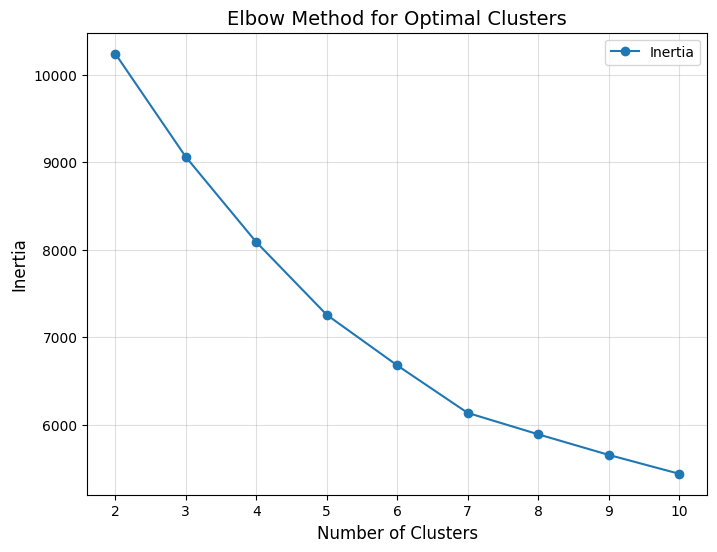

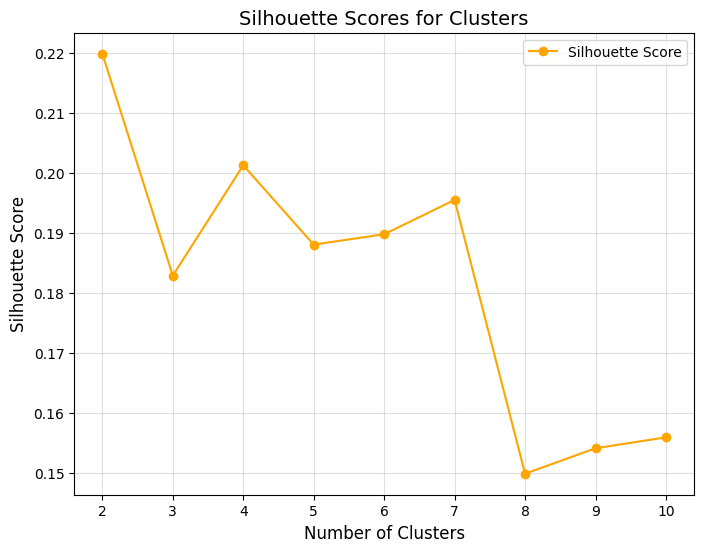

Optimal number of clusters determined: 2
Performing K-Means clustering with 2 clusters...


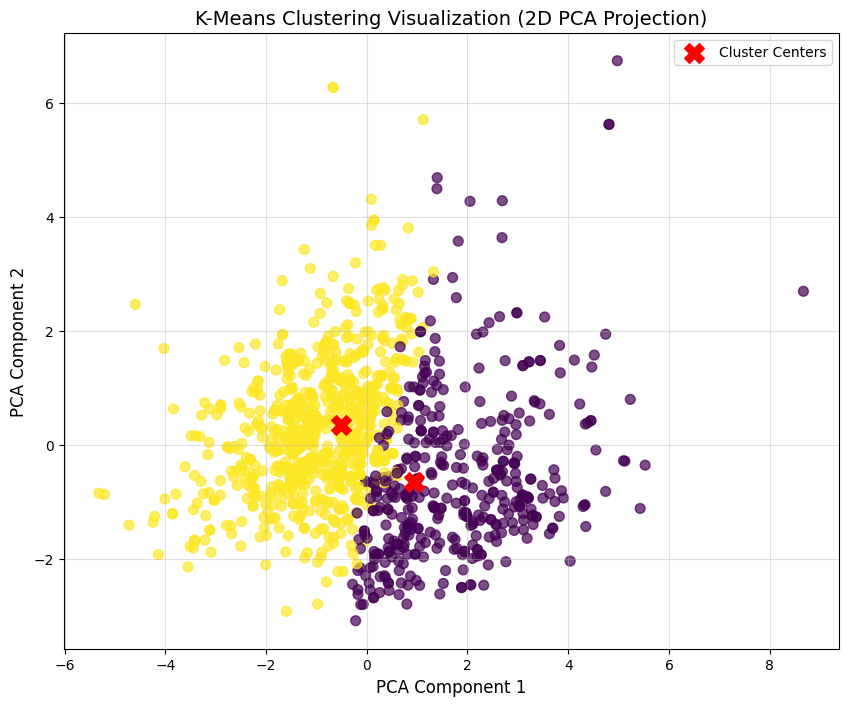

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def determine_optimal_clusters(data, max_clusters):

    inertia = []
    silhouette_scores = []
    clusters_range = range(2, max_clusters + 1)

    for k in clusters_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plotting Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(clusters_range, inertia, marker='o', label='Inertia')
    plt.title('Elbow Method for Optimal Clusters', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

    # Plotting Silhouette Scores
    plt.figure(figsize=(8, 6))
    plt.plot(clusters_range, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
    plt.title('Silhouette Scores for Clusters', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

    # Return the optimal number of clusters (choose based on Elbow and highest Silhouette)
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"Optimal number of clusters determined: {optimal_clusters}")
    return optimal_clusters

# Apply the function to determine optimal clusters
max_clusters = 10
optimal_clusters = determine_optimal_clusters(processed_wine_data.drop(columns=['quality']), max_clusters)

def perform_clustering_and_visualize(data, n_clusters):

    print(f"Performing K-Means clustering with {n_clusters} clusters...")

    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Visualize clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    plt.title('K-Means Clustering Visualization (2D PCA Projection)', fontsize=14)
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

    return kmeans, cluster_labels

# Perform clustering and visualize
kmeans_model, cluster_labels = perform_clustering_and_visualize(processed_wine_data.drop(columns=['quality']), optimal_clusters)


Regression Analysis

Step 1: Splitting Data into Training and Testing Sets


In [9]:
from sklearn.model_selection import train_test_split

# Define features (independent variables) and target (dependent variable)
features = dataset.drop(columns=['quality'])  # Drop the target column
target = dataset['quality']  # Select the target column

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Data Split Complete!")
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Data Split Complete!
Training data shape: (914, 12), Testing data shape: (229, 12)


Step 2: Training a Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize and train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print("Regression Model Trained!")

Regression Model Trained!


Step 3: Evaluating the Regression Model

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.3824283521291846
Root Mean Squared Error (RMSE): 0.6184079172594612
R² Score: 0.31276385395084094


Step 4: Visualizing Actual vs Predicted Values

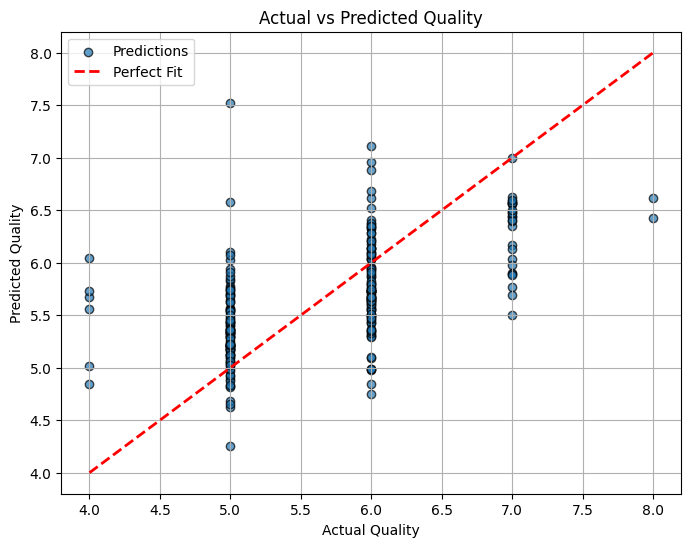

In [12]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Fit')
plt.title("Actual vs Predicted Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.grid()
plt.legend()
plt.show()